# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [4]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [5]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

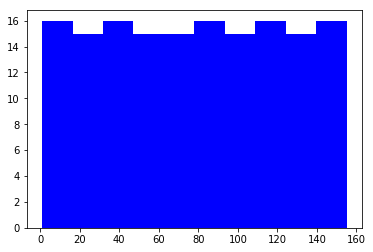

In [16]:
n, bins, patches = plt.hist(df['Positive affect'], 10, facecolor='b')

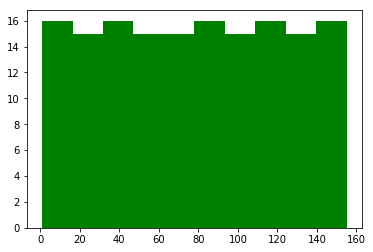

In [19]:
n, bins, patches = plt.hist(df['Freedom'], 10, facecolor='g')

По графикам видно, что количество параметров для каждого параметра в паре одинаковое сл-но распределение равномерное.

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

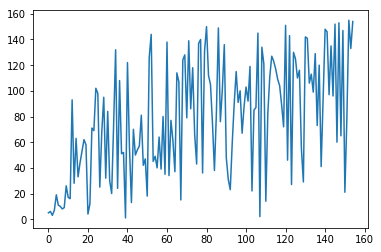

In [58]:
x = [i for i in range(0, len(filtered_df['Freedom']))]
y = filtered_df['Freedom']
plt.plot(x,y)

In [41]:
filtered_df = df[df['Freedom']>=0] # удаляем выброс NaN

In [36]:
print('Медиана:',statistics.median(filtered_df['Freedom']))

Медиана: 78.0


In [37]:
print('Мат. ожидание:', statistics.mean(filtered_df['Freedom']))

Мат. ожидание: 78.0


In [47]:
print('Стандартное отклонение:',statistics.pstdev(filtered_df['Freedom']))

Стандартное отклонение: 44.74371464239419


In [51]:
print('Дисперсия:', statistics.pvariance(filtered_df['Freedom']))

Дисперсия: 2002.0


In [52]:
min(filtered_df['Freedom'])

1.0

In [53]:
max(filtered_df['Freedom'])

155.0

In [61]:
freedom_range = max(filtered_df['Freedom']) - min(filtered_df['Freedom'])
print(freedom_range)

154.0


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

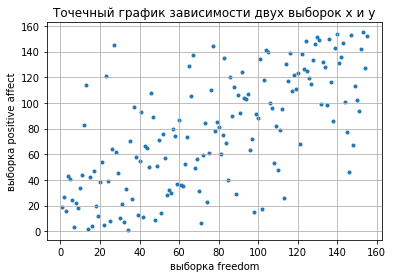

In [62]:
freedom = filtered_df['Freedom']
positive_affect = filtered_df['Positive affect']
plt.xlabel('выборка freedom')
plt.ylabel('выборка positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(freedom, positive_affect, marker='.')

In [65]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(freedom, positive_affect)
print('Коэффициент корреляции Пирсона:', corr)
# Знак коэффициента говорит, что зависимость прямая чем больше х тем больше Y

Коэффициент корреляции Пирсона: 0.6817698430601656


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [66]:
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1))

0.0


In [68]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1,1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

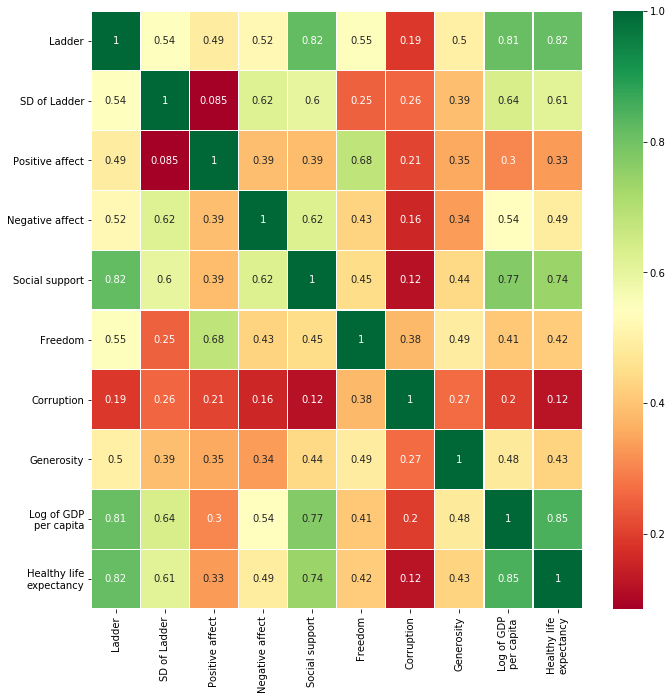

In [70]:
import seaborn as sns
sns.heatmap(filtered_df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(11,11)
plt.show()

Загрузить следующую таблицу: 

In [75]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
data=pd.read_csv(url)
data[:7]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

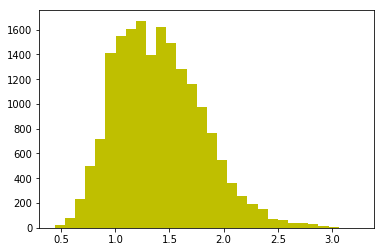

In [77]:
n, bins, patches = plt.hist(data['AveragePrice'], 30, facecolor='y')

In [ ]:
# Здесь распределение явно нормальное.

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

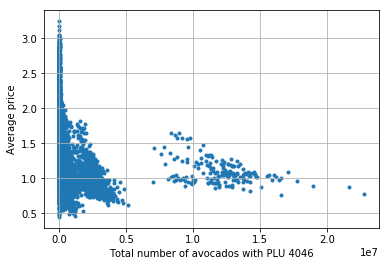

In [78]:
total_number_PLU4046 = data['4046']
average_price = data['AveragePrice']
plt.xlabel('Total number of avocados with PLU 4046')
plt.ylabel('Average price')
plt.grid(True)
plt.scatter(total_number_PLU4046, average_price, marker='.')

По графику сложно сказать,что корреляция есть, если есть то небольшая.
Я могу проверить это через коэффициент Пирсона?
Он получился небольшим и отрицательным, то есть зависимость небольшая и обратная. Чем больше кол-во авокадо, тем меньше цена.


In [80]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(total_number_PLU4046, average_price)
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: -0.20831704848788477
